# Descubra quem fez o Enem 2016 apenas para treino

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importando e visualizando as bases

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
print('Total de variáveis na base de treino:', len(df_train.columns))
print('Total de variáveis na base de teste:', len(df_test.columns))

Total de variáveis na base de treino: 167
Total de variáveis na base de teste: 43


In [5]:
features_init = df_test.columns.tolist()
features_init.append('IN_TREINEIRO')

In [6]:
df_train_feat = df_train[features_init]
df_train_feat.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,0


## Visualizando os valores nulos e sua porcentagem

In [7]:
status_train = pd.DataFrame({'columns': df_train_feat.columns,
                             'type': df_train_feat.dtypes,
                             'Sum of NaN': df_train_feat.isnull().sum(),
                             'NaN%': df_train_feat.isnull().sum()/len(df_train_feat)})
status_train.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False).head(15)

,type,Sum of NaN,NaN%
TP_DEPENDENCIA_ADM_ESC,float64,9448,0.688128
TP_ENSINO,float64,9448,0.688128
Q027,object,7373,0.536999
NU_NOTA_REDACAO,float64,3597,0.261981
NU_NOTA_LC,float64,3597,0.261981
TP_STATUS_REDACAO,float64,3597,0.261981
NU_NOTA_COMP1,float64,3597,0.261981
NU_NOTA_COMP2,float64,3597,0.261981
NU_NOTA_COMP3,float64,3597,0.261981
NU_NOTA_COMP4,float64,3597,0.261981


## Entendendo as correlações de todas as variáveis em relação a variável 'IN_TREINEIRO'

In [8]:
df_train_feat.corr(method = 'spearman')['IN_TREINEIRO'].sort_values(ascending=False).head(5)

IN_TREINEIRO       1.000000
TP_ST_CONCLUSAO    0.536272
TP_PRESENCA_CH     0.094805
TP_PRESENCA_CN     0.094805
TP_PRESENCA_MT     0.092589
Name: IN_TREINEIRO, dtype: float64

In [9]:
df_train_feat.corr(method = 'spearman')['IN_TREINEIRO'].sort_values().head(5)

NU_IDADE           -0.535499
TP_ANO_CONCLUIU    -0.344331
TP_ESCOLA          -0.258023
CO_UF_RESIDENCIA   -0.055914
NU_NOTA_CH         -0.049434
Name: IN_TREINEIRO, dtype: float64

As variáveis TP_ST_CONCLUSAO tem uma correlação positiva e as variáveis NU_IDADE, TP_ANO_CONCLUIU tem uma correlação negativa. 

Motivo pelo qual decidi utilizar o método spearman:
    
* [Spearman rank correlation: Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.  The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/)

### Visualizando a correlação entre as variáveis selecionadas

In [10]:
features_selected = df_train_feat[['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'NU_IDADE', 'TP_ANO_CONCLUIU']]

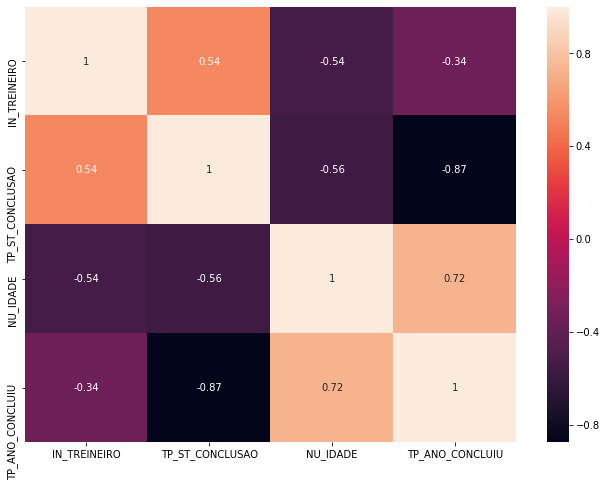

In [11]:
corr = features_selected.corr(method = 'spearman')
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

## Visualizando as variáveis em relação ao IN_TREINEIRO

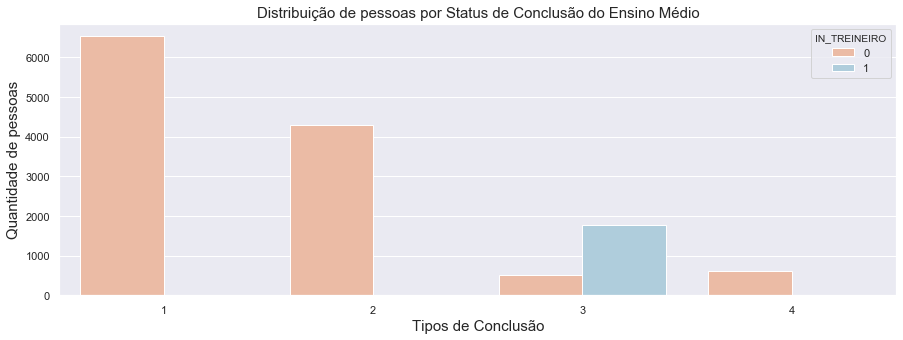

In [12]:
plt.figure(figsize = (15,5))
sns.set(style="darkgrid")
sns.countplot(x = 'TP_ST_CONCLUSAO', data= df_train_feat, hue= 'IN_TREINEIRO', palette="RdBu")
plt.title('Distribuição de pessoas por Status de Conclusão do Ensino Médio', size=15)
plt.xlabel('Tipos de Conclusão', size = 15)
plt.ylabel('Quantidade de pessoas', size = 15)
plt.show()

In [13]:
#df_train_feat.groupby('TP_ST_CONCLUSAO')['IN_TREINEIRO'].sum()

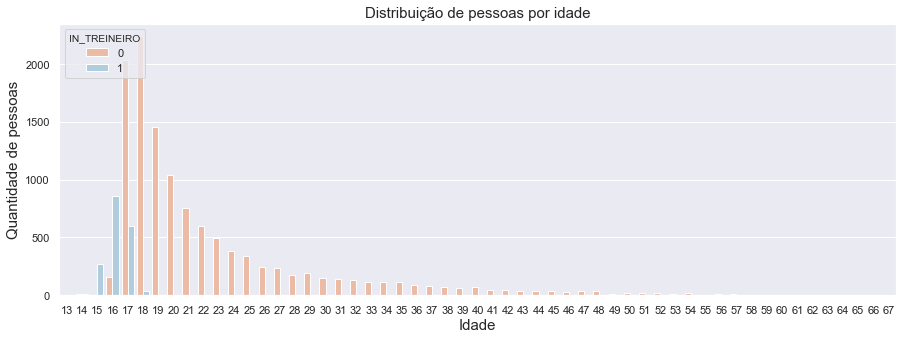

In [14]:
plt.figure(figsize = (15,5))
sns.set(style="darkgrid")
sns.countplot(x = 'NU_IDADE', data= df_train_feat, hue= 'IN_TREINEIRO', palette="RdBu")
plt.title('Distribuição de pessoas por idade', size=15)
plt.xlabel('Idade', size = 15)
plt.ylabel('Quantidade de pessoas', size = 15)
plt.show()

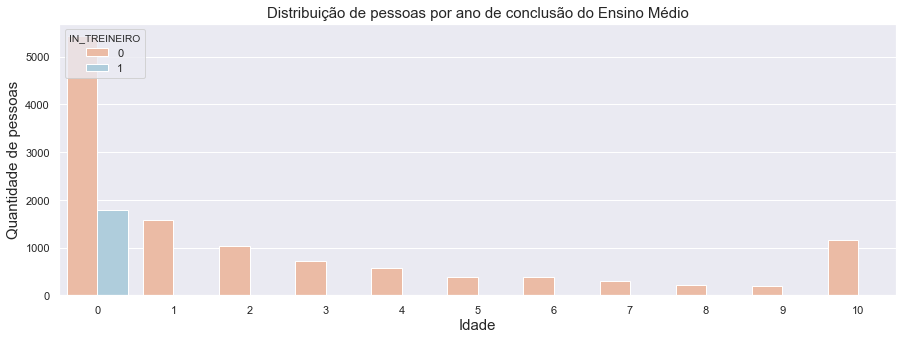

In [15]:
plt.figure(figsize = (15,5))
sns.set(style="darkgrid")
sns.countplot(x = 'TP_ANO_CONCLUIU', data= df_train_feat, hue= 'IN_TREINEIRO', palette="RdBu")
plt.title('Distribuição de pessoas por ano de conclusão do Ensino Médio', size=15)
plt.xlabel('Idade', size = 15)
plt.ylabel('Quantidade de pessoas', size = 15)
plt.show()

Reminder: 0 é a classificação 'Não informado.

Desconsiderei essa feature por ela não impactar em nenhum dos indicadores

### Visualizando a variável IN_TREINEIRO

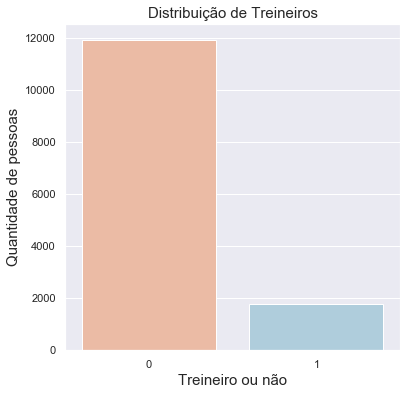

In [16]:
plt.figure(figsize = (6,6))
sns.set(style="darkgrid")
sns.countplot(x = 'IN_TREINEIRO', data= df_train_feat, palette="RdBu")
plt.title('Distribuição de Treineiros', size=15)
plt.xlabel('Treineiro ou não', size = 15)
plt.ylabel('Quantidade de pessoas', size = 15)
plt.show()

## Seleção de variáveis

In [17]:
# sm = SMOTE()
# x_train_bal, y_train_bal = sm.fit_resample(df_train_feat[['TP_ST_CONCLUSAO', 'NU_IDADE']],
#                                           df_train_feat['IN_TREINEIRO'])

Desconsiderei esse resample (que foi pensado devido ao desbalanceamento da feature IN_TREINEIRO) pois nos meus testes isso faz com que minha precisão diminuisse. 
Reminder: Entender o porque disso ter acontecido.

In [18]:
x_train_bal, y_train_bal = (df_train_feat[['TP_ST_CONCLUSAO', 'NU_IDADE']], df_train_feat['IN_TREINEIRO'])

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train_bal, y_train_bal, test_size = 0.2, random_state=42)

In [21]:
x_test = df_test[['TP_ST_CONCLUSAO', 'NU_IDADE']]

## Transformando as variáveis

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

## Modelo de Classificação

In [23]:
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
y_pred_val = classifier.predict(x_val)

Accuracy: 0.9970866715222141
Precision: 1.0


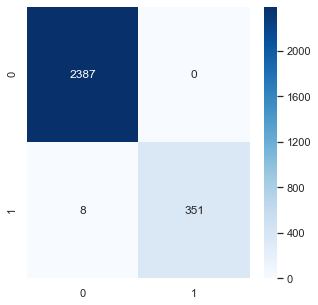

In [25]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_val,y_pred_val), annot=True, cmap="Blues", fmt= 'g')
print('Accuracy:', metrics.accuracy_score(y_val,y_pred_val))
print('Precision:', metrics.precision_score(y_val,y_pred_val))

In [26]:
y_pred_test = classifier.predict(x_test)

In [27]:
df_answer = pd.DataFrame({'NU_INSCRICAO': df_test.NU_INSCRICAO,
                          'IN_TREINEIRO': y_pred_test})

## Resultado

In [28]:
df_answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
5,3f28749fb79fb059caf5aed79625a5addfd7a91a,0
6,bb2a0edddf3c59181a1496390aaaee7f32624d9d,1
7,cc7cab347fe5455aae983f3701ca40f84dc01949,0
8,95e9338f1da02f7bfa0e3194130afdccc0fb5457,1
9,155f84f2ee5b34e658f2adcc70f2ec83e37040cb,0


In [29]:
df_answer.to_csv('answer.csv', index=False, header=True)

Resultado: 99.73%